# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

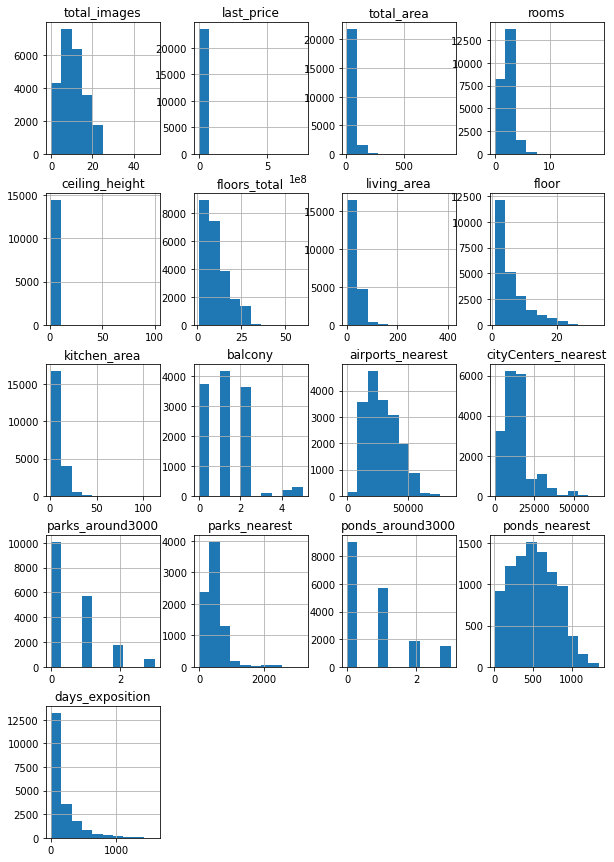

In [75]:

data.info()
data.hist(figsize=(10, 15))

ТИПЫ ДАННЫХ ИЗМЕНЕНИЯ

last_price: вещественное число 

first_day_exposition: перевести во временной формат

floors_total: вещественное число переделать по вводным данным целое число (этажей)

is_apartment: строка, по вводным данным булев тип

balcony:  по вводным данным целое число (балконов) 

parks_around3000:  по вводным данным целое число  (парков) 

ponds_around3000:  по вводным данным целое число  (водоемов) 

days_exposition:  по вводным данным целое число  (дней)


Проведем изменения и приступим к анализу возможных пропусков




In [76]:
data['last_price'] = data['last_price'].astype('int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['is_apartment'] = data['is_apartment'].astype('boolean')
data.dtypes


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [77]:
data.duplicated().sum()
#Проверка на явные дубликаты

0

Получим информацию о количестве пропусков и их доле в общем количестве данных

In [78]:
print('Количество пропусков всего:',data.isna().sum())
#Общее количество строк в датафрейме 23699, пропуски присутсвуют во множестве столбцов.
print(data.isnull().sum()/ len(data)* 100)




Количество пропусков всего: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.

На основе информации о количестве пропусков в столбцах таблицы можно сделать выводы о том какие изменения рациональнее провести со столбцами, имеющими пропуски.

1. balcony: С наибольшей вероятностью, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.
2. is_apartment: Скорее всего, пользователи часто не указывают тип недвижимости, так как не до конца понимают отличие именно апартаментов. Т.к. в этом столбце булев тип данных, пропуски можно заменить на False.
3. ceiling_height, locality_name, floors_total- ошибки в этих столбцах не значительны для конечной цели исследовани, поэтому пропуски в них пока оставляем.
4. cityCenters_nearest,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest - ошибки в этих столбцах не значительны для конечной цели исследовани, поэтому пропуски в них пока оставляем, ожнако можно заметить что в данных столбцах ошибки скорее всего вызваны отсутсвием информации о географическом положении объектов недвижимости.
5. living_area и kitchen_area, вероятно прпоуски вызваны тем что пользователи не имеют информации о точных площадях отдельных частей квартиры, однако эти данные важны для финального анализа, поэтому прпоуски оставляем
6. days_exposition - эти данные важны для исследования, пропуски заполнить нельзя, поэтому оставляем


In [79]:
#Устраняем пропуски в 'balcony' 'is_apartment'
data['balcony'].fillna(0, inplace=True)
data['is_apartment'].fillna(False, inplace=True)
data['balcony'].isna().sum()
data['is_apartment'].isna().sum()

0

In [80]:
#Устраняем пропуски в 'ceiling_height' заполняя их медианным значением по определенным населенным пунктам
for locality in data['locality_name'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

0

In [81]:
#Устраняем пропуски в 'city_centers_nearest' заполняя их медианным значением по определенным населенным пунктам
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality), 'cityCenters_nearest'].median()

data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()
data['cityCenters_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

0

In [82]:
#Неявные дубликаты
data = data.dropna(subset=['locality_name'])
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [83]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('деревня','посёлок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции','посёлок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','посёлок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','посёлок')
data['locality_name'] = data['locality_name'].str.replace('село','посёлок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок','населенный пункт ')



print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'населенный пункт  Агалатово'
 'населенный пункт  Александровская' 'населенный пункт  Алексеевка'
 'населенный пункт  Аннино' 'населенный пункт  Аро'
 'населенный пункт  Барышево' 'населенный пункт  Батово'
 'населенный пункт  Бегуницы' 'населенный пункт  Белогорка'
 'населенный пункт  Белоостров' 'населенный пункт  Большая Вруда'
 'населенный пункт  Большая Ижора' 'населенный пункт  Большая Пустомержа'
 'населенный пункт  Большие Колпаны' 'населенный пункт  Большое Рейзино'
 'населенный

In [84]:
#Удалим строки без указания города, так как это критично для дальнейшего анализа
data = data.dropna(subset=['locality_name'])

In [85]:
data['ceiling_height'].describe().T

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

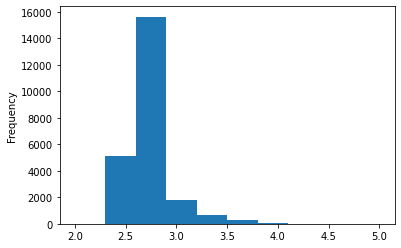

In [86]:
#Разберемся с высотой потолков
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))


Как можно заметить,наибольшее количество высот потолков сосредоточено в диапазоне от 2,5 до 2,9 метров дальше нужно проверить размах высот, чтобы более точно определить выбросы

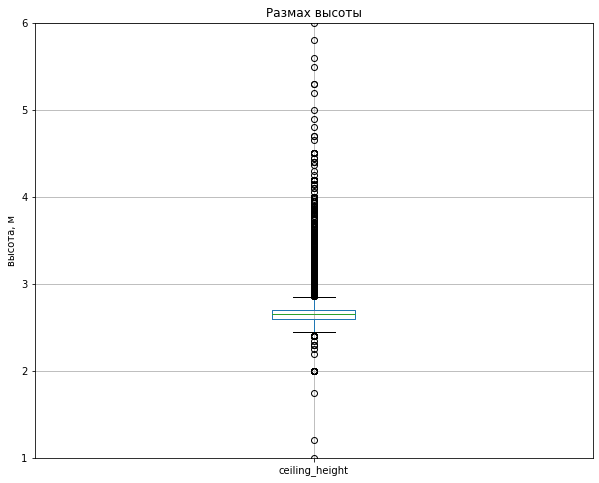

In [87]:
data.boxplot(column='ceiling_height', figsize=(10, 8))
plt.title('Размах высоты')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Выбросами можно назвать значения меньше 2,5 м и больше 2,8 м. Следовательно стоит удалить строки, в которых высота меньше 2,5 и больше 4,5 метров. так как количество значений в них слишком мало и нереалистично


In [88]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [89]:
data = data.query('2.5 <= ceiling_height <= 4.5')
data['cityCenters_nearest'].isna().sum()

0

In [90]:
#Разберемся с количеством этажей
data['floors_total'].describe().T

count    23469.000000
mean        10.687588
std          6.596840
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [91]:

#Максиммальное количество этажей не реалистично. Логичным будет огранчить максимальное количество этажей числом 30(выше этого уровня здания строятся редко, следовательно стоит их удалить)
data = data.query('floors_total < 30 or floors_total.isna()')
data['floors_total'].describe().T

count    23438.000000
mean        10.653639
std          6.531952
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

Проверим на выбросы те значения, в которых они могут быть и влиять на дальнейший анализ

In [92]:
data['days_exposition'].describe().T

count    20363.000000
mean       180.849826
std        220.023238
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

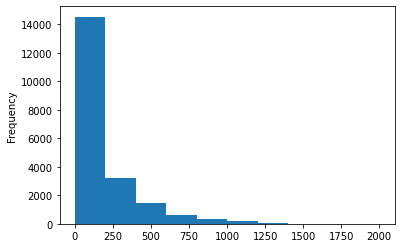

In [93]:
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 10, range=(0,2000))

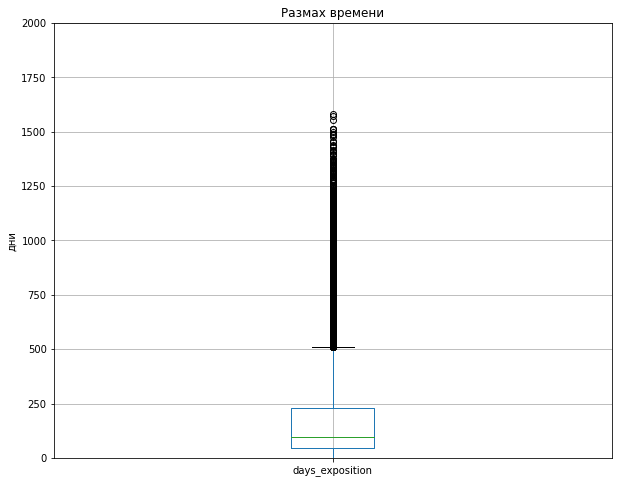

In [94]:
data.boxplot(column='days_exposition', figsize=(10, 8))
plt.title('Размах времени')
plt.ylim(0, 2000)
plt.ylabel('дни')
plt.show()

Можно сделать вывод о том что обьявления, находящиеся на сайте больше 1500 дней, т.е. больше четырех лет, можно считать выбросами

In [95]:
data = data.query('days_exposition < 1500 or days_exposition.isna()')
data['days_exposition'].describe().T

count    20357.000000
mean       180.449133
std        218.813441
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1497.000000
Name: days_exposition, dtype: float64

In [96]:
data['floor'].describe().T

count    23517.000000
mean         5.882170
std          4.858626
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

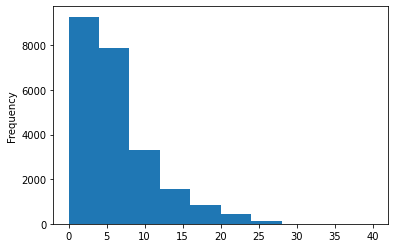

In [97]:
data['floor'].sort_values().plot(y = 'floor', kind = 'hist', bins = 10, range=(0,40))

In [98]:
data = data.query('floor < 30')
data['floor'].describe().T

count    23517.000000
mean         5.882170
std          4.858626
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Исключили выбивающиеся значения этажа, так как ранее было выяснено что максимальная высота здания в таблице- 29 этажей

In [99]:
data['living_area'].describe().T

count    21629.000000
mean        34.420787
std         21.889878
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

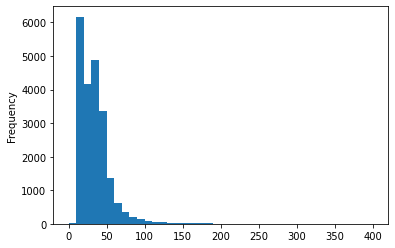

In [100]:
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 40, range=(0,400))

In [101]:
data = data.query('living_area < 200')
data['living_area'].describe().T

count    21597.000000
mean        34.085980
std         20.004619
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        199.000000
Name: living_area, dtype: float64

Исключили значения жилой площади до 200 квадратных метров(хоть такие значения могут встретиться в единичных примерах элитного жилья), значения больше этого значения встречаются достаточно редко, чтобы считаться выбросами

In [102]:
data['last_price'].describe().T

count    2.159700e+04
mean     6.299841e+06
std      7.752718e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.735600e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

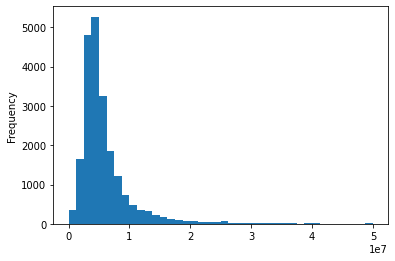

In [103]:
data['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 40, range=(0, 50000000))

In [104]:
data = data.query('last_price < 40000000')
data['last_price'].describe().T

count    2.145400e+04
mean     5.867618e+06
std      4.436560e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.695000e+06
max      3.999000e+07
Name: last_price, dtype: float64

Цену предложений ограничили 40 миллионами, что будет включать в себя даже жилье в центре, полностью закрывая отдельные выбросы, которые влияют на общу картину.

ВЫВОД по предобработке
1. Изменили типы данных,
2. привели имена столбцов к единому стилю,
3. обработали явные и неявные дубликаты,
4. также обработали пропуски

### Посчитайте и добавьте в таблицу новые столбцы

Задача:

добавить следующие столбцы:


1. цена одного квадратного метра ('square_meter_price')
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) ('exposition_weekday')
3. месяц публикации объявления ('exposition_month')
4. год публикации объявления ('exposition_year')
5. тип этажа квартиры (значения — «первый», «последний», «другой») ('floor_category') 
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) ('city_centers_nearest_km')

In [105]:
#1
data['square_meter_price'] = data['last_price'] / data['total_area']
#1.1
data['square_meter_price'] = data['square_meter_price'].round(2)


In [106]:
#2
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
#3
data['exposition_month'] = data['first_day_exposition'].dt.month
#4
data['exposition_year'] = data['first_day_exposition'].dt.year

In [107]:
#5
def floor_category(row): 
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis=1)

In [108]:
#6
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [109]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,13.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,13.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой,52.0


### Проведите исследовательский анализ данных

#### Распределение предложений по параметрам

##### Общая площадь

In [110]:
data['total_area'].describe().T

count    21454.000000
mean        58.597312
std         28.813449
min         12.000000
25%         40.000000
50%         51.700000
75%         68.895000
max        380.000000
Name: total_area, dtype: float64

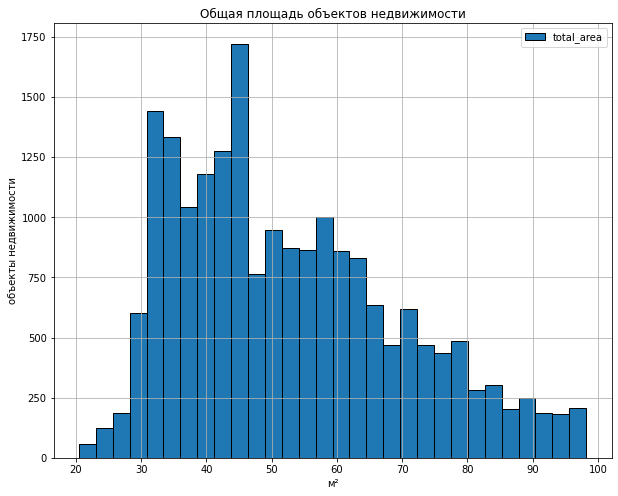

In [111]:
a=data['total_area'].quantile(.25)
b=data['total_area'].quantile(.75)
c=data['total_area'].mean()
# Построим гистограмму 
data['total_area'].hist(bins=30, range=((a-c/3), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Мы рассмотрели диапазон примерно от 20 до 105 квадратных метров, так как значения вне его, встречаются редко и являются выбросами. Большая часть предложений содержится в диапазоне от 30 до 62 квадратных метров. Среднее значение-60 м. Самый распространенный вариант 45 м, видимо это связано с типовой застройкой. Медианное значение 52 м.

##### Жилая площадь

In [112]:
data['living_area'].describe().T

count    21454.000000
mean        33.603510
std         18.835815
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        199.000000
Name: living_area, dtype: float64

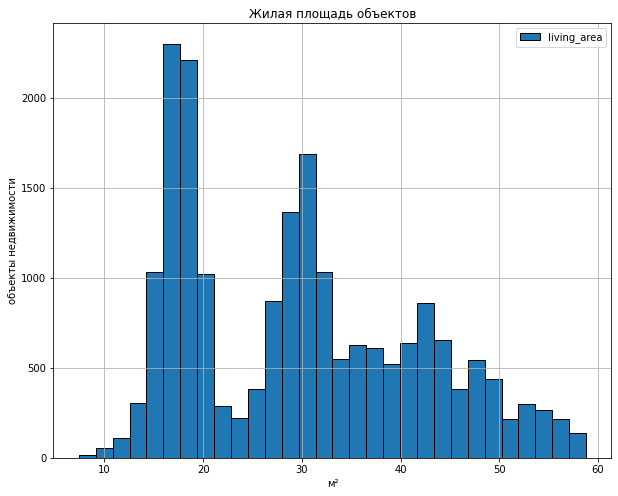

In [113]:
a=data['living_area'].quantile(.25)
b=data['living_area'].quantile(.75)
c=data['living_area'].mean()
# Построим гистограмму 
data['living_area'].hist(bins=30, range=((a-c/3), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()


Мы рассмотрели диапазон примерно от 10 до 58 квадратных метров, так как значения вне его, встречаются редко и являются выбросами. Большая часть предложений содержится в диапазоне от 15 до 22  и от 25 до 48 квадратных метров. Среднее значение-34м. Самый распространенный вариант 15 м. Медианное значение 30 м.

##### Площадь кухни

In [114]:
data['kitchen_area'].describe().T

count    20658.000000
mean        10.335908
std          5.228727
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        100.700000
Name: kitchen_area, dtype: float64

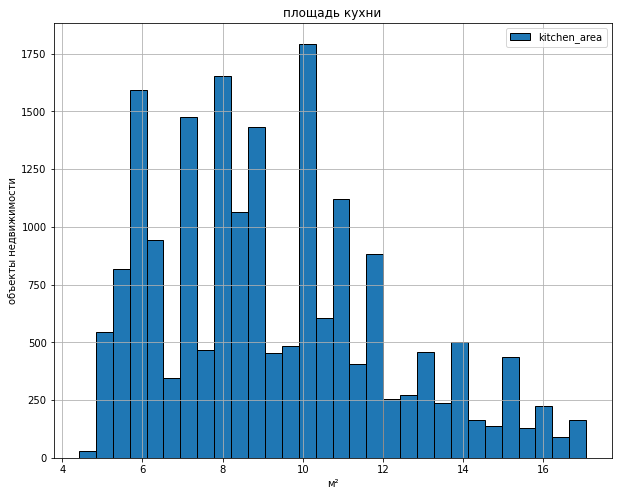

In [115]:
a=data['kitchen_area'].quantile(.25)
b=data['kitchen_area'].quantile(.75)
c=data['kitchen_area'].mean()
# Построим гистограмму 
data['kitchen_area'].hist(bins=30, range=((a-c/4), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('площадь кухни')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()


Мы рассмотрели диапазон примерно от 5 до 17 квадратных метров, так как значения вне его, встречаются редко и являются выбросами. Большая часть предложений содержится в диапазоне от 5 до 12  квадратных метров. Среднее значение-10 м. Самый распространенный вариант 10 м. Медианное значение 9 м.

##### Цена объекта

In [116]:
data['last_price'].describe().T

count    2.145400e+04
mean     5.867618e+06
std      4.436560e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.695000e+06
max      3.999000e+07
Name: last_price, dtype: float64

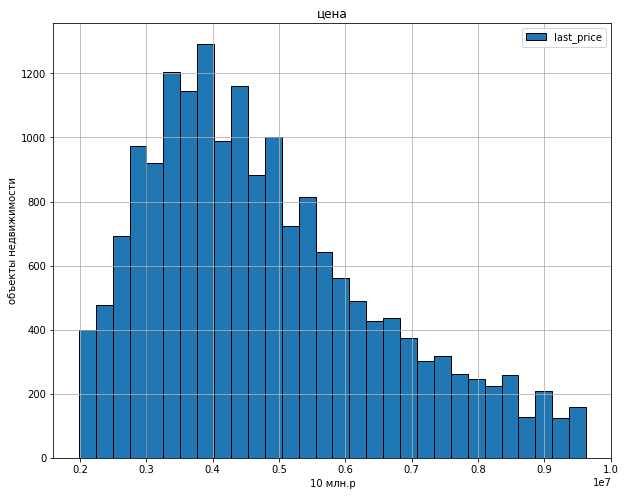

In [117]:
a=data['last_price'].quantile(.25)
b=data['last_price'].quantile(.75)
c=data['last_price'].mean()
# Построим гистограмму 
data['last_price'].hist(bins=30, range=((a-c/4), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('цена')
plt.xlabel('10 млн.р')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до примерно 11 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 9 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

##### Количество комнат

In [118]:
data['rooms'].describe().T

count    21454.000000
mean         2.049967
std          1.038315
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

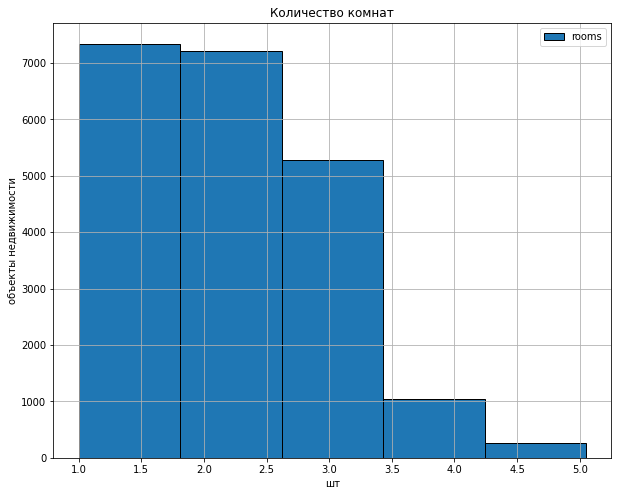

In [119]:
a=data['rooms'].quantile(.25)
b=data['rooms'].quantile(.75)
c=data['rooms'].mean()
# Построим гистограмму 
data['rooms'].hist(bins=5, range=(1, (b+c)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат')
plt.xlabel('шт')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 немного. Среднее и медиана 2 комнаты. Крайне редкие значения с количеством комнат более 6 не оказывают существенного влияния на общую картину



##### Высота потолков

In [120]:
data['ceiling_height'].describe().T

count    21454.000000
mean         2.694143
std          0.208629
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

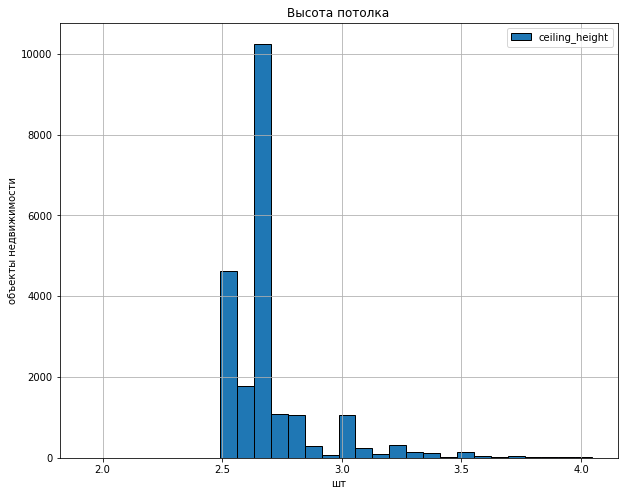

In [121]:
a=data['ceiling_height'].quantile(.25)
b=data['ceiling_height'].quantile(.75)
c=data['ceiling_height'].mean()
# Построим гистограмму 
data['ceiling_height'].hist(bins=30, range=((a-c/4), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолка')
plt.xlabel('шт')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон высоты от 2,5 до 4,5 метров. Большая часть объектов недвижимости имеют 3 метра высоты, чуть меньше -  2,5. Объектов, с высотами отличающимися от наиболее распространенных немного. Среднее и медиана 2,65 метра. Крайне редкие значения с количеством комнат более 3 не оказывают существенного влияния на общую картину

##### Этаж квартиры

In [122]:
data['floor'].describe().T

count    21454.000000
mean         5.885942
std          4.850508
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

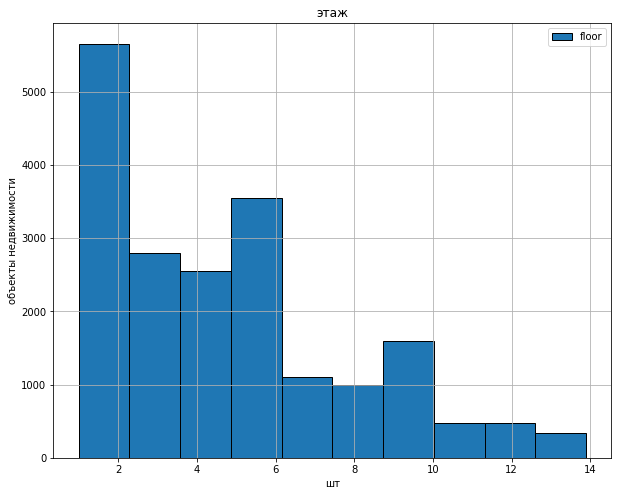

In [123]:
a=data['floor'].quantile(.25)
b=data['floor'].quantile(.75)
c=data['floor'].mean()
# Построим гистограмму 
data['floor'].hist(bins=10, range=(1, (b+c)), figsize=(10, 8), ec='black', legend=True)
plt.title('этаж')
plt.xlabel('шт')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон этажей от 1 до 14. Большая часть объектов недвижимости имеют от 1 до 5 этажей, скорее всего это вызвано тем что большая часть продаваемых объектов находится либо в малоэтажном, либо в пятиэтажных постройках, которые наиболее распространены. Среднее 5 (4,85) этажа, медиана 4 этажа. Крайне редкие значения с количеством этажей более 5 не оказывают существенного влияния на общую картину, хоть и распространены.

##### Тип этажа квартиры («первый», «последний», «другой»)

In [124]:
data['floor_category'].describe().T

count      21454
unique         3
top       другой
freq       15801
Name: floor_category, dtype: object

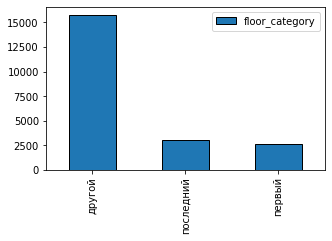

In [125]:

# Построим гистограмму 
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Наиболее распространенное значение, "другой" ведь количество продаваемых пентхаусов и квартир на первом этаже значительно меньше( примерно в 6 раз), возможно это вызвано наличием плюсов у данных типов расположения квартир, либо их малым числом относительно общего количества квартир.

##### Общее количество этажей в доме

In [126]:
data['floors_total'].describe().T

count    21403.000000
mean        10.651404
std          6.512523
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

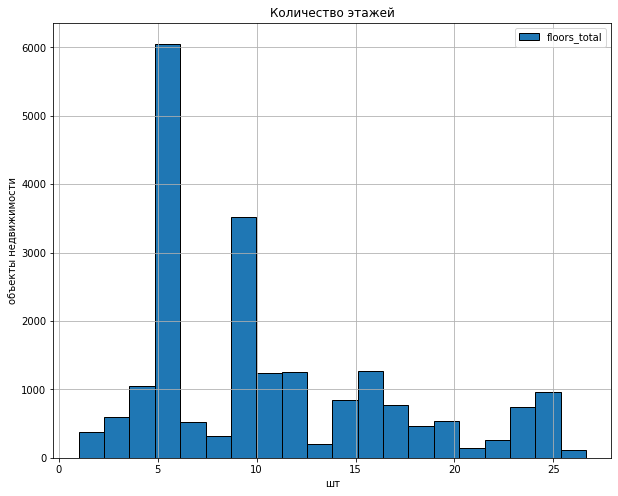

In [127]:
a=data['floors_total'].quantile(.25)
b=data['floors_total'].quantile(.75)
c=data['floors_total'].mean()
# Построим гистограмму 
data['floors_total'].hist(bins=20, range=(1, (b+c)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество этажей')
plt.xlabel('шт')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон этажности зданий от 1 до 30 этажей. Большая часть объектов недвижимости имеют от 5 до 10 этажей.

Самые распространенные значения 5 и 10 этажей, скорее всего это вызвано тем что дома данной этажности производились серийно, следовательно их количество высоко.

Среднее 11  этажей, медиана 9 этажа. 

Редкие значения с количеством этажей более 20 не оказывают существенного влияния на общую картину, хоть и распространены.

##### Расстояние до центра города в метрах

In [128]:
data['cityCenters_nearest'].describe().T

count    21454.000000
mean     14053.476904
std       7627.250244
min        181.000000
25%      11025.250000
50%      13098.500000
75%      15320.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

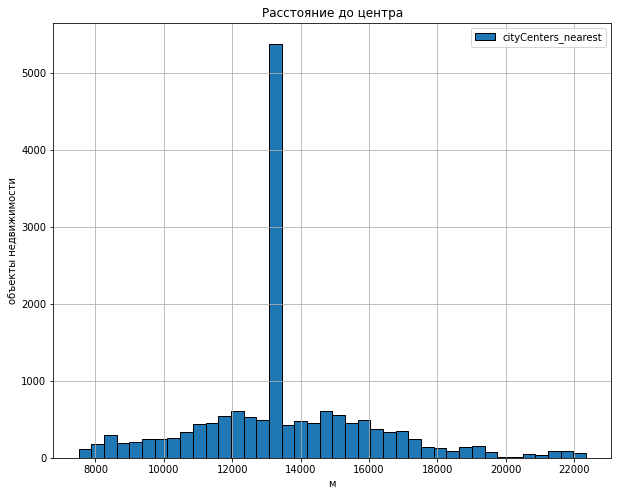

In [129]:
a=data['cityCenters_nearest'].quantile(.25)
b=data['cityCenters_nearest'].quantile(.75)
c=data['cityCenters_nearest'].mean()
# Построим гистограмму 
data['cityCenters_nearest'].hist(bins=40, range=((a-c/4), (b+c/2)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Медиана, а также среднее значение равны 13 км, что совпадает с пиковым значением, скорее всего это связано с тем что данный показатель имел большое количество пропусков, которое заполнялось медианным значением по населенным пунктам.
Из этого можно сделать вывод о том что наибольший процент предлагаемых к продаже объектов жилья располагается в ближайших пригородах на расстоянии примерно в 13 км от центра.

##### Расстояние до ближайшего аэропорта

In [130]:
data['airports_nearest'].describe().T

count    16579.000000
mean     28824.109536
std      12716.917866
min          0.000000
25%      18459.000000
50%      26791.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

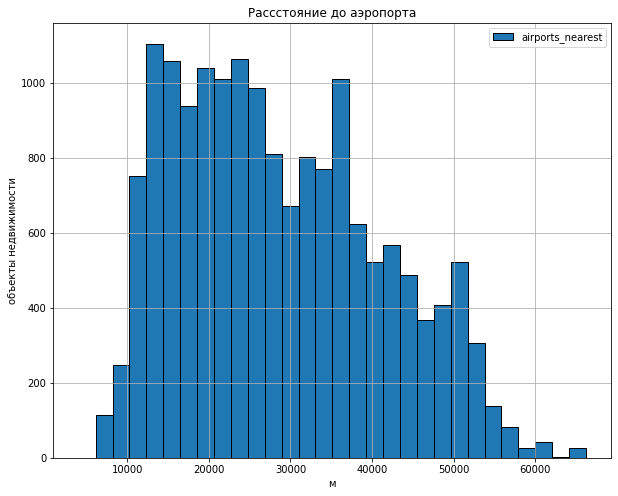

In [131]:
a=data['airports_nearest'].quantile(.25)
b=data['airports_nearest'].quantile(.75)
c=data['airports_nearest'].mean()
# Построим гистограмму 
data['airports_nearest'].hist(bins=30, range=((a-c/2), (b+c)), figsize=(10, 8), ec='black', legend=True)
plt.title('Рассстояние до аэропорта')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Наибольшее количество значений сосредоточено в диапазоне от 12 до 38 км, что может указывать что большая часть представленных обьявлений расположена примерно в одном районе, отдаленном от аэропортов. Среднее значение- 28.8 км, медианное 26.77 км.

Ближайший расположен на расстоянии 7ми километров от аэропорта.

Присутсвуют обьявления с расстоянием до аэропорта свыше 40 км, следовательно довольно большой процент объектов находится далеко от аэропортов, но на фоне общей картины они важны.



##### Расстояние до ближайшего парка

In [132]:
data['ponds_nearest'].describe().T

count    8186.000000
mean      523.625214
std       276.814405
min        13.000000
25%       303.000000
50%       507.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

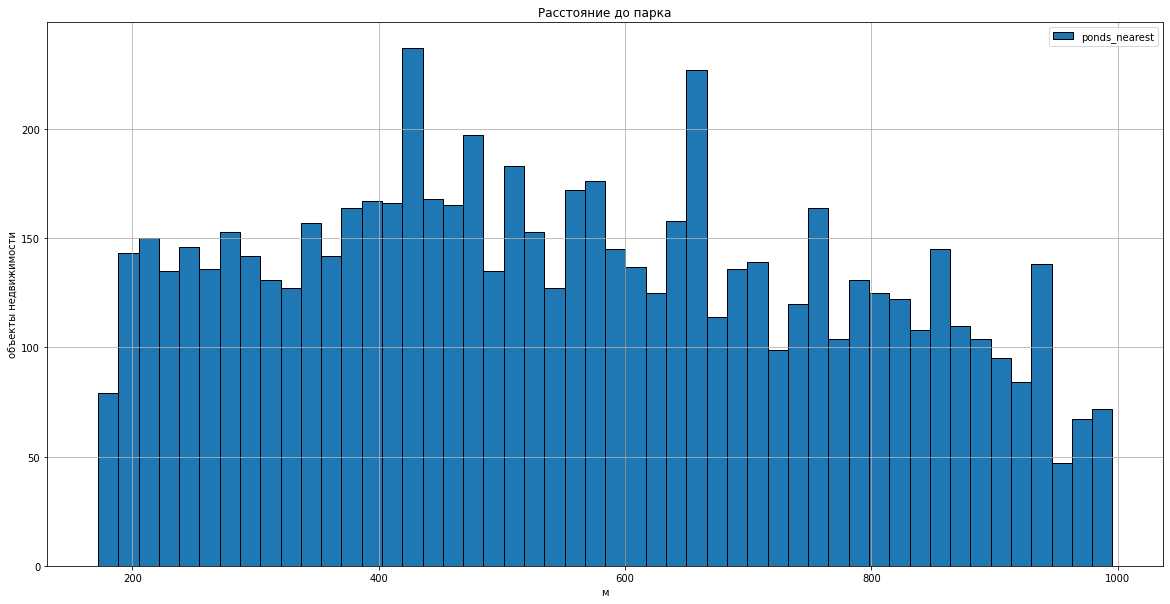

In [133]:
a=data['ponds_nearest'].quantile(.25)
b=data['ponds_nearest'].quantile(.75)
c=data['ponds_nearest'].mean()
# Построим гистограмму 
data['ponds_nearest'].hist(bins=50, range=((a-c/4), (b+c/2)), figsize=(20, 10), ec='black', legend=True)
plt.title('Расстояние до парка')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Наибольшее количество значений сосредоточено в диапазоне от 400 до 600 км, что может указывать что большая часть представленных обьявлений расположена примерно в одном районе, отдаленном от парка примерно на пол километра. Среднее значение- 519 км, медианное 503 км.

Ближайший расположен на расстоянии 100 метров от парка.

Присутсвуют обьявления с расстоянием до аэропорта свыше 800 м, следовательно довольно большой процент объектов находится далеко от парка, но на фоне общей картины они важны.

Распределение значений равномерное без резких выбросов, и провалов, следовательно можно сделать вывод о большом количестве парков в жилой застройке.


##### Время публикации объявления

###### День публикации

In [134]:
data['exposition_weekday'].describe().T

count    21454.000000
mean         2.550200
std          1.782012
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [135]:
day= data['exposition_weekday'].value_counts().sort_values()
print(day)

6    1490
5    1705
0    3297
2    3599
4    3628
1    3834
3    3901
Name: exposition_weekday, dtype: int64


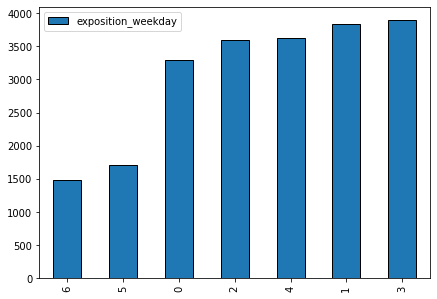

In [136]:
day.plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни.

###### Месяц публикации

In [137]:
data['exposition_month'].describe().T

count    21454.000000
mean         6.420947
std          3.464259
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [138]:
month= data['exposition_month'].value_counts().sort_values()
print(month)

5     1178
1     1299
12    1342
7     1522
6     1587
8     1590
9     1860
10    2002
4     2184
11    2218
3     2328
2     2344
Name: exposition_month, dtype: int64


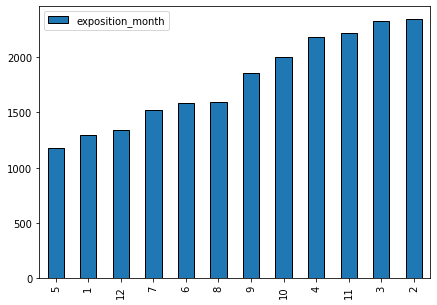

In [139]:
month.plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали в феврале и марте. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.

##### Год публикации

In [140]:
data['exposition_year'].describe().T

count    21454.000000
mean      2017.355924
std          1.042967
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: exposition_year, dtype: float64

In [141]:
year= data['exposition_year'].value_counts().sort_values()
print(year)

2014     118
2015    1079
2016    2610
2019    2654
2018    7450
2017    7543
Name: exposition_year, dtype: int64


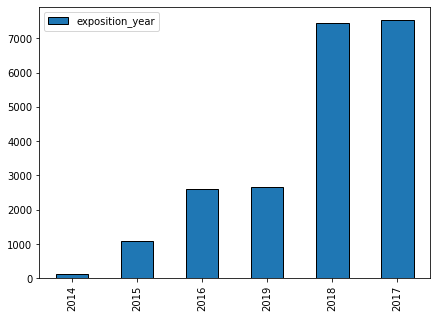

In [142]:
year.plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно что наибольшее количество обьявлений было выставлено в 2017 и 2018 

#### Факторы влияния на скорость продажи

In [143]:
data['days_exposition'].describe().T

count    18529.00000
mean       183.48497
std        219.46351
min          1.00000
25%         44.00000
50%        100.00000
75%        236.00000
max       1497.00000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней

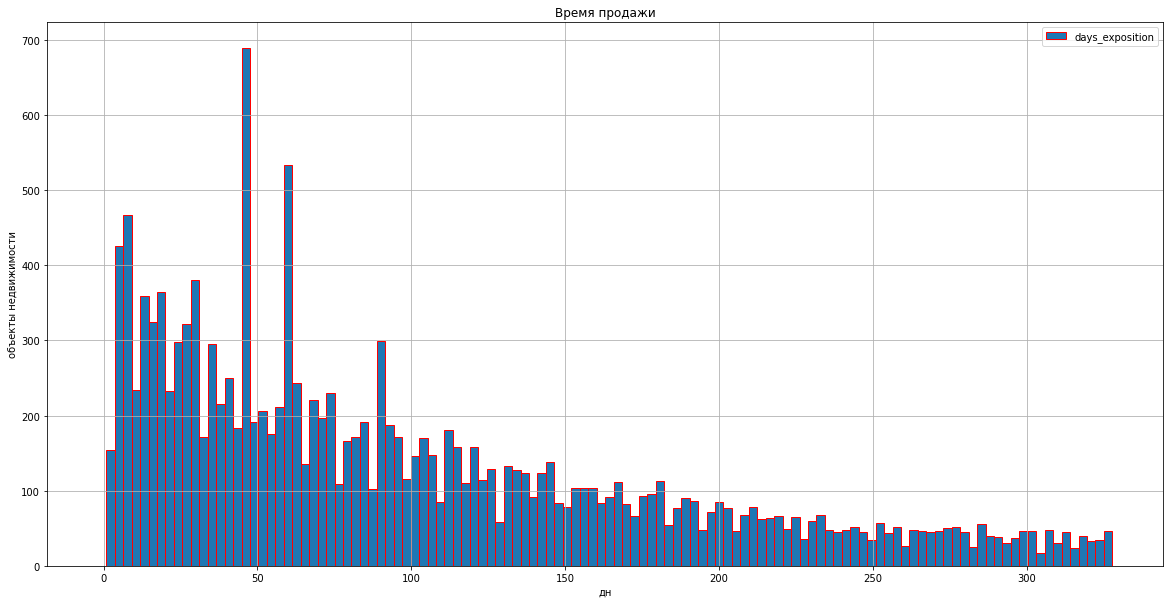

In [144]:
a=data['days_exposition'].quantile(.25)
b=data['days_exposition'].quantile(.75)
c=data['days_exposition'].mean()
# Построим гистограмму 
data['days_exposition'].hist(bins=120, range=((a-c/4), (b+c/2)), figsize=(20, 10), ec='red', legend=True)
plt.title('Время продажи')
plt.xlabel('дн')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней, имеется большое количество больших значений, из за которых нельзя делать выводы о подавляющем большинстве значений (сосредоточенных в районе до 90 дней). 

Изменим масштаб - изменим период до 90 дней.



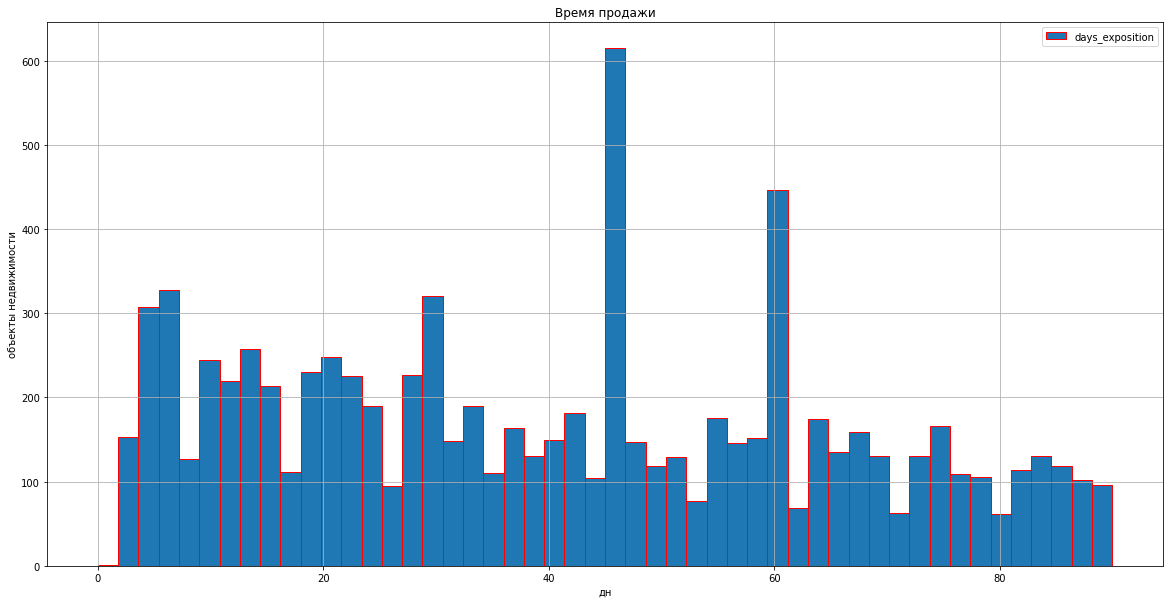

In [145]:
data['days_exposition'].hist(bins=50, range=(0, 90), figsize=(20, 10), ec='red', legend=True)
plt.title('Время продажи')
plt.xlabel('дн')
plt.ylabel('объекты недвижимости')
plt.show()

По графику можно наблюдать что наиболее часто объекты продаются на 45 и 60 дни после появления на сайте. Возможно это связано с ротацией на главной странице.

Однако возможно часть из значений значат не проданные квартиры, а те которые не были сняты с сайта после сделки, либо наоборот убраны в связи с окончанием срока размещения.

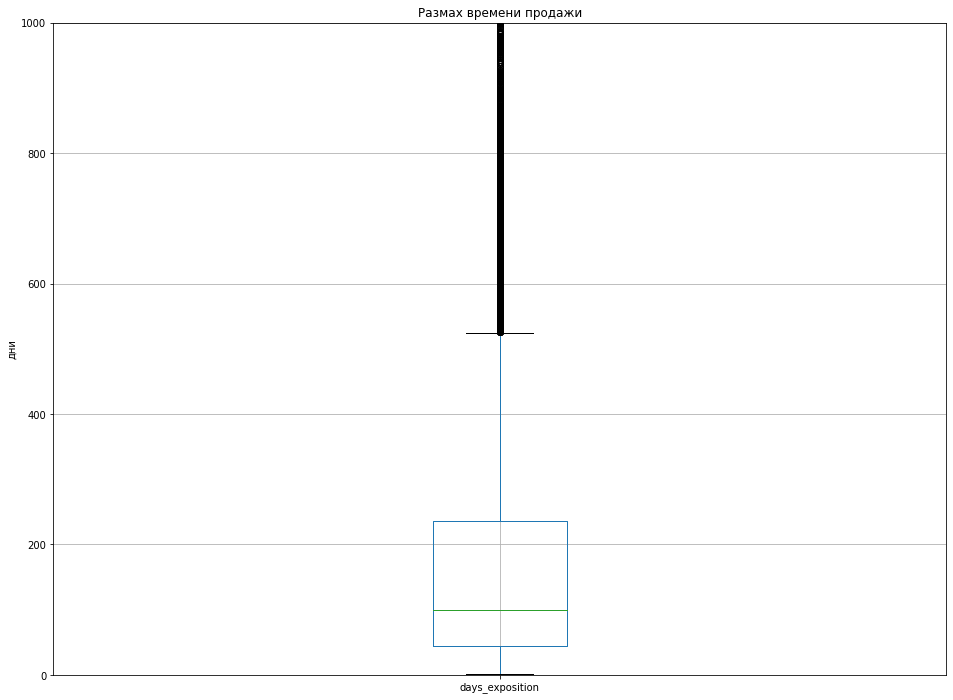

In [146]:
#Проверим на выбросы
data.boxplot(column='days_exposition', figsize=(16, 12))
plt.title('Размах времени продажи')
plt.ylim(0, 1000)
plt.ylabel('дни')
plt.show()

Можно наблюдать большое количество выбросов, исключим их из рассматриваемого диапазона.

Выбросами можно считать значения выше 520 дней.

In [147]:
data_new = data.query('days_exposition < 520 or days_exposition.isna()')

In [148]:
print(len(data)-len(data_new))

1501


Убрали из датафрейма 1261 строк, которые содержали выбросы по времени продажи объекта. Оценка времени продажи:

Быстрая продажа - до 45 дней.

Нормальная продажа - от 45 до 231 дней. 

Долгая продажа - от 231 до 520 дней. 

Продажи после 520 дней - выбросы.

#### Факторы влияния на стоимост объекта

Графики:

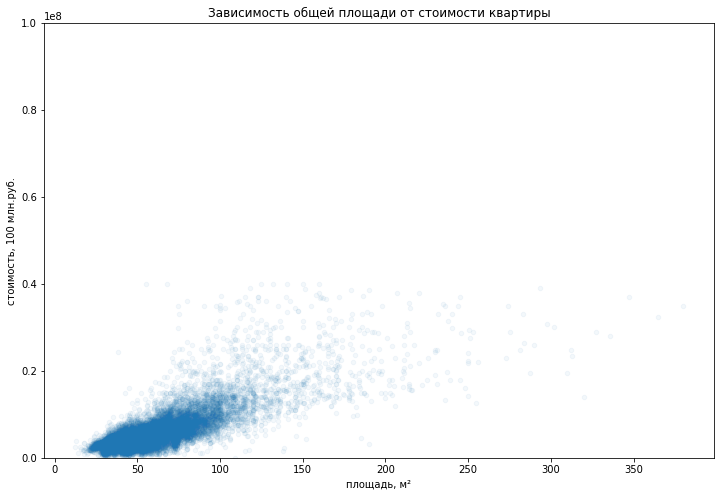

In [149]:
data_new.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(12, 8), legend=True, alpha = 0.05)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Вывод: Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена

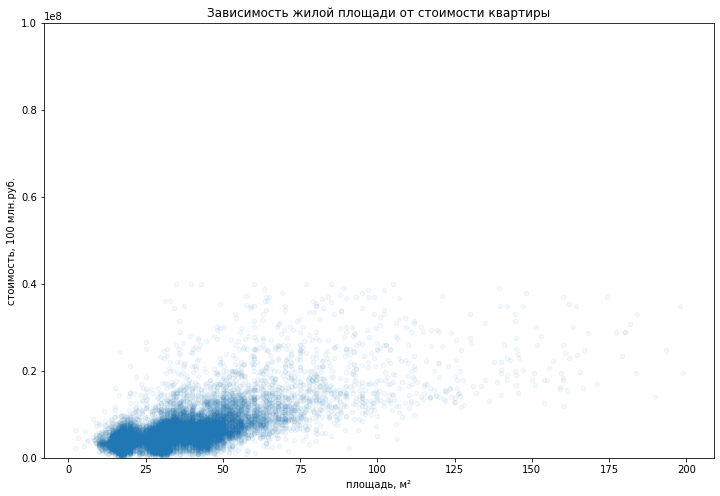

In [150]:
data_new.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(12, 8), legend=True, alpha = 0.05)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жило площадью до 75 м². Зависимость прямопропорциональная - чем больше жилаяплощадь квартиры, тем выше ее стоимость

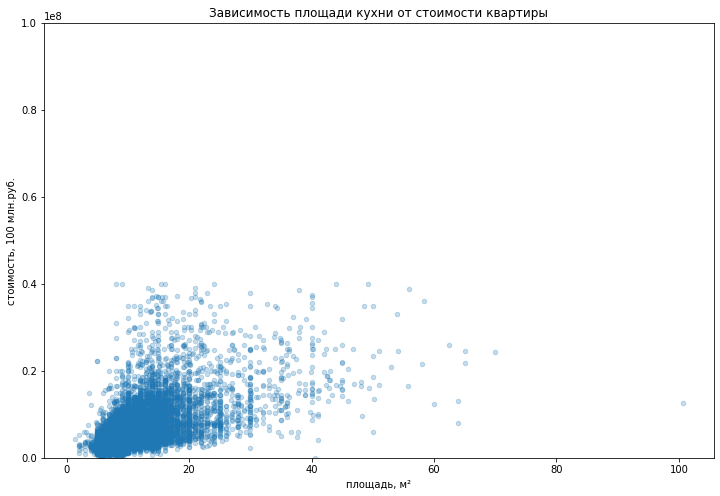

In [151]:
data_new.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(12, 8), legend=True, alpha = 0.25)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Вывод: Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость

<AxesSubplot:xlabel='rooms'>

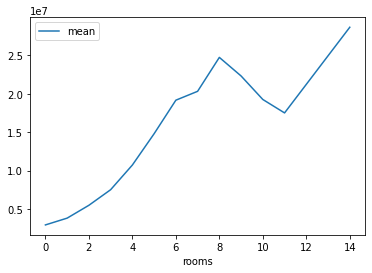

In [152]:


pivot_table_rooms = data_new.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count'])
pivot_table_rooms.columns = ['mean', 'count']
pivot_table_rooms.plot(y = 'mean', legend=True)



Цена находится в прямой зависимости от количеств комнат, наблюдается линейный ее рост до отметки в 6 квартир, после чего резкое увеличение и спад, это может быть связано с изменением класса жилья при переходе некоего рубежа в количестве комнат

<AxesSubplot:xlabel='exposition_weekday'>

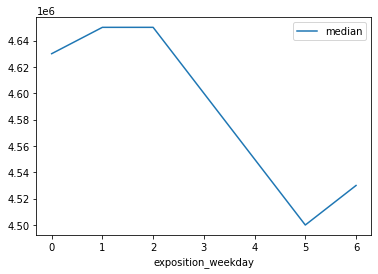

In [155]:
pivot_table_rooms = data_new.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_table_rooms.columns = ['mean', 'count', 'median']

pivot_table_rooms.plot(y = 'median', legend=True)





Вывод: можно заметить что большая часть обьявлений с самой крупной стоиммостью выставляется в начале недели, а после вторника средняя их стоимость становится все меньше.

<AxesSubplot:xlabel='exposition_month'>

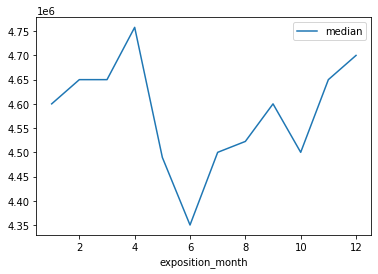

In [163]:


pivot_table_rooms = data_new.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = [ 'count', 'median'])

pivot_table_rooms.columns = [ 'count', 'median']

pivot_table_rooms.plot(y = 'median', legend=True)



Вывод: можно заметить что пик средней стоимости весной в апреле, а наиболее дешевые предложения летом, в июне, после чего цена начинает вновь увеличиваться

<AxesSubplot:xlabel='exposition_year'>

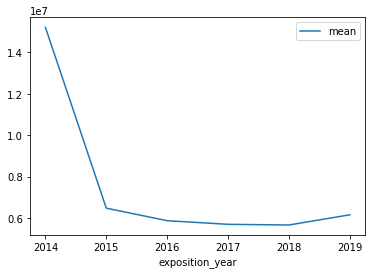

In [160]:


pivot_table_rooms = data_new.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['mean', 'count'])

pivot_table_rooms.columns = ['mean', 'count']

pivot_table_rooms.plot(y = 'mean', legend=True)

Наибольшее количество самых дорогих предложений было выставлено в 2014 году, после чего цена резко уменьшилась скорее всего это связано с кризисом того периода.

,mean,count
floor_category,,
другой,6.217667e+06,13974
первый,4.447829e+06,2233
последний,6.742264e+06,2536


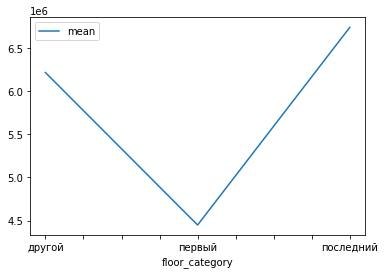

In [69]:
pivot_table_floor_category = data_new.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count'])
pivot_table_floor_category.columns = ['mean', 'count']
pivot_table_floor_category.plot(y = 'mean', legend=True)

pivot_table_floor_category

Можно сказать с уверенностью о том что цены на квартиры, находящиеся на первом этаже цена сильно ниже чем на все остальные.

,last_price,total_area,kitchen_area,rooms,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.788053,0.597342,0.519760,-0.009715,-0.006400,-0.004306
total_area,0.788053,1.000000,0.571934,0.795579,-0.008348,-0.004211,-0.047449
kitchen_area,0.597342,0.571934,1.000000,0.215795,-0.008949,0.001139,-0.031293
rooms,0.519760,0.795579,0.215795,1.000000,-0.001249,-0.009989,-0.021168
exposition_weekday,-0.009715,-0.008348,-0.008949,-0.001249,1.000000,0.014799,-0.016461
exposition_month,-0.006400,-0.004211,0.001139,-0.009989,0.014799,1.000000,-0.285094
exposition_year,-0.004306,-0.047449,-0.031293,-0.021168,-0.016461,-0.285094,1.000000


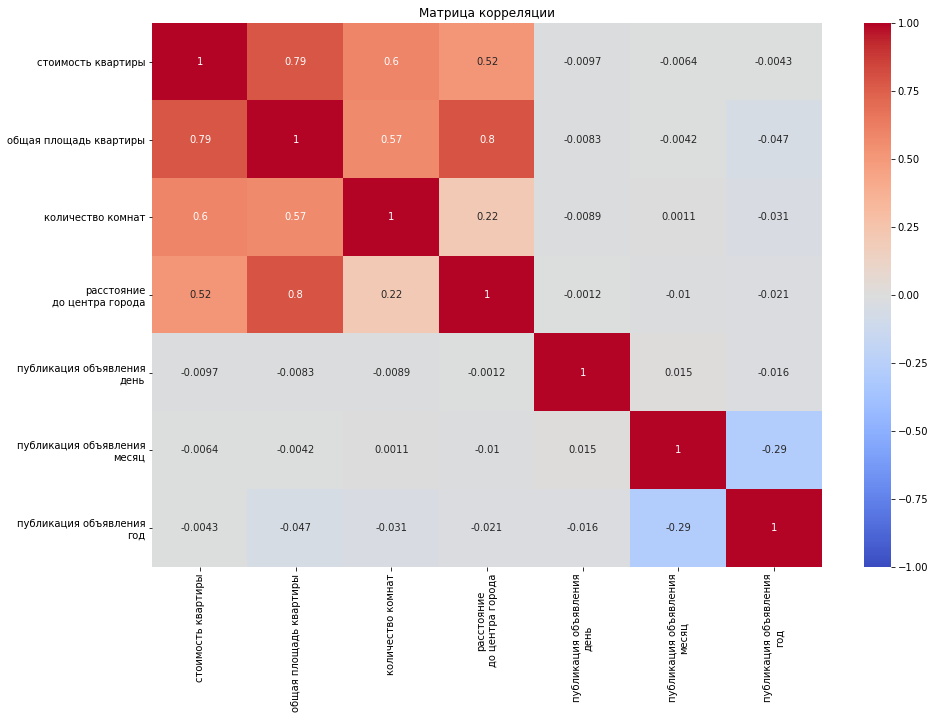

In [165]:
parametres = [
    'last_price',
    'total_area',
    'kitchen_area',
    'rooms',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']
corr_matrix = data_new[parametres].corr()
display(corr_matrix)



corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

Мы получили таблицу, которая иллюстрирует зависимость между параметрами.

Из нее мы можем сделать выводы о том что наибольшая корреляция прослеживается между ценой и общей площадью недвижимости, а также отдельными ее частями.
Связи со временем публикации не прослеживается, что подтверждается близкими к нулю коэффициентами.

Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадтю. Соответственно чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь

#### Средняя цена от населенного пункта

In [71]:
top_10 = data_new['locality_name'].value_counts().head(10)
display(top_10)

Санкт-Петербург      12441
посёлок Мурино         520
посёлок Шушары         389
Всеволожск             308
Колпино                293
посёлок Парголово      287
Пушкин                 277
деревня Кудрово        269
Гатчина                245
Выборг                 191
Name: locality_name, dtype: int64

In [72]:


top_10_pivot =  data_new.query('locality_name in @top_10.index').pivot_table(index = 'locality_name', values = 'square_meter_price')
top_10_pivot= top_10_pivot.sort_values(by='square_meter_price', ascending=False)

display(top_10_pivot)

,square_meter_price
locality_name,
Санкт-Петербург,111622.636770
Пушкин,101851.012924
деревня Кудрово,92685.355465
посёлок Парголово,89192.878502
посёлок Мурино,85958.585135
посёлок Шушары,77901.706298
Колпино,74768.674642
Всеволожск,68605.620519
Гатчина,68083.280857


<AxesSubplot:ylabel='locality_name'>

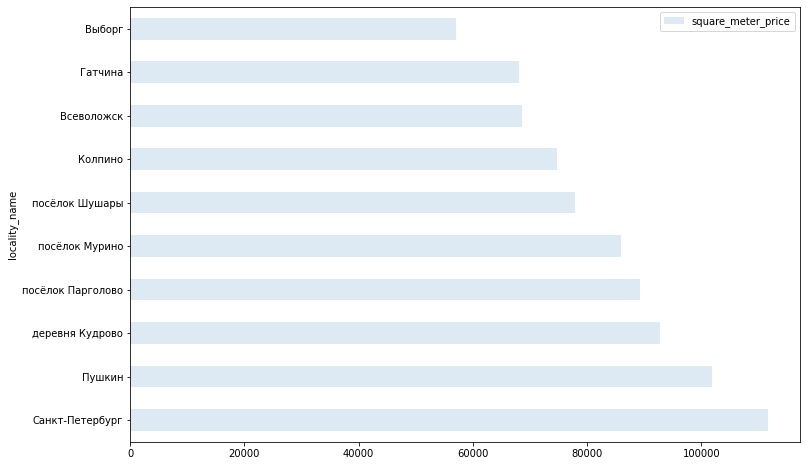

In [73]:
top_10_pivot.plot( kind='barh', figsize=(12, 8), legend=True, alpha = 0.15)

Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111622. руб.), что логично. 

Следом по стоимости идет Пушкин(101851 руб.). 

Наименьшая цена за квадратный метр в Выборге(57117 руб.)

#### Средняя цена расстояния до центра города

In [167]:
data_spb = data_new.query('locality_name == "Санкт-Петербург"')

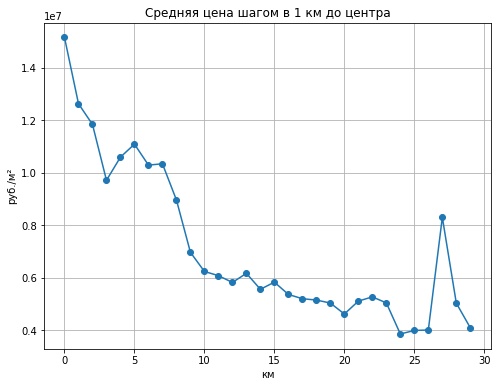

In [168]:
(
data_spb
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(от 0 до 3 км). 

После пяти километров цена падает почти линейно.

Пик в районе 27 км может быть связан с первыми элитными загородными поселками/районами.

### Общий вывод

*Наибольшее влияние на стоимость квартиры оказывает её площадь.* Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на 8 км.

*Мы получили представление о типичном объекте недвижимости:* квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 35 м², площадью кухни около 9 м², с высотой потолков 2,6/3 м, стоимостью около 3.8 млн.руб, расположенной на удалении от центра на расстоянии 13 км, от аэропорта на расстоянии 12-26 км, до ближайшего парка около 400 метров.

Также установлено:

*Ожидаемое время продажи объекта недвижимости* - от 45 до 231 день.
*Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* - 111622 руб./м² (топ-10 населенных пунктов по количеству объявлений).
*Самая низкая средняя стоимость квадратного метра в Выборге* - 57117 руб./м² (топ-10 населенных пунктов по количеству объявлений).